In [3]:
!pip install xgboost

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
df = pd.read_csv('dataset.csv')

In [3]:
df

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
1,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
2,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
3,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
4,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,T0005908506,40.15,E,4.0,NaN,NaN,A,2.74625,1,NaN,49,63,Female,3
109518,T0005908507,20.18,NaN,10.0,2.69374,C,F,4.52625,1,48.0,47,62,Female,3
109519,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
109520,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2


In [4]:
df.shape

(109522, 14)

In [5]:
df = df.drop(['Trip_ID'],axis=1)

In [6]:
df.columns

Index(['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [7]:
df.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [8]:
#Data Analysis
print(len(df[df['Surge_Pricing_Type']==1]))
print(len(df[df['Surge_Pricing_Type']==2]))
print(len(df[df['Surge_Pricing_Type']==3]))

22689
47176
39657


<Figure size 720x360 with 0 Axes>

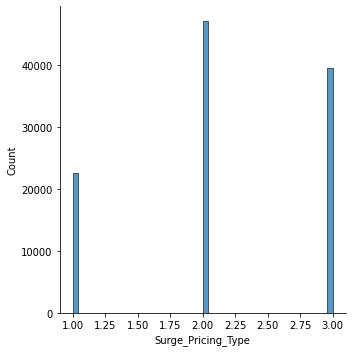

In [9]:
plt.figure(figsize=(10,5))
sns.displot(df['Surge_Pricing_Type'])
plt.show()

In [10]:
print(df.isnull().sum())

Trip_Distance                      0
Type_of_Cab                    16765
Customer_Since_Months           4903
Life_Style_Index               16850
Confidence_Life_Style_Index    16850
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           59159
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64


In [11]:
#detecting missing values
count = 0
for col in df.columns:
    if df[col].isnull().sum() == 0:
        count+=1
    else:
        print("Missing values found in "+col)

if count==df.shape[1]:
    print("No missing value found in any column")

Missing values found in Type_of_Cab
Missing values found in Customer_Since_Months
Missing values found in Life_Style_Index
Missing values found in Confidence_Life_Style_Index
Missing values found in Var1


In [12]:
df['Type_of_Cab'].unique()

array(['B', nan, 'C', 'E', 'D', 'A'], dtype=object)

In [13]:
df['Type_of_Cab'] = df['Type_of_Cab'].fillna('F')

In [14]:
df['Type_of_Cab'].unique()

array(['B', 'F', 'C', 'E', 'D', 'A'], dtype=object)

In [17]:
#Customer_Since_Months attributes NaN values are replaced with 0

In [15]:
df['Customer_Since_Months'].unique()

array([10.,  2.,  3.,  5., nan,  1.,  4.,  0.,  9.,  6.,  7.,  8.])

In [16]:
df['Customer_Since_Months'].fillna(0,inplace=True)

In [17]:
df['Customer_Since_Months'].unique()

array([10.,  2.,  3.,  5.,  0.,  1.,  4.,  9.,  6.,  7.,  8.])

In [ ]:
#Interpretation through miscellaneous attribute combinations

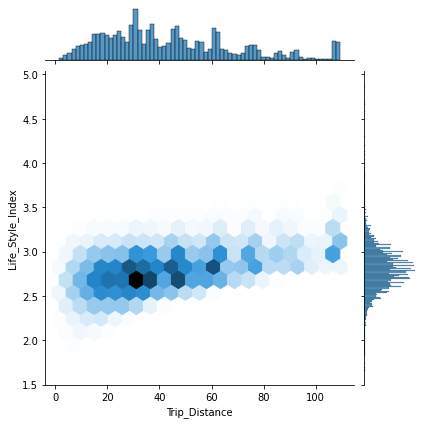

In [18]:
sns.jointplot(x='Trip_Distance', y='Life_Style_Index', data=df, kind='hex', gridsize=20)

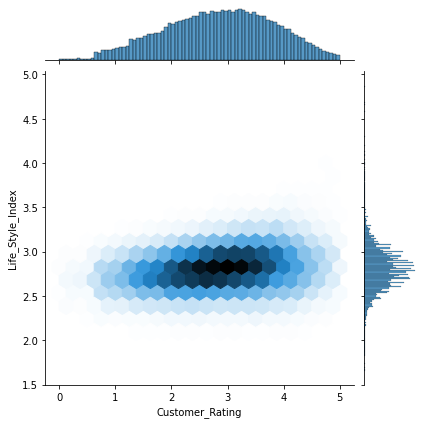

In [19]:
sns.jointplot(x='Customer_Rating', y="Life_Style_Index", data=df, kind='hex', gridsize=20)

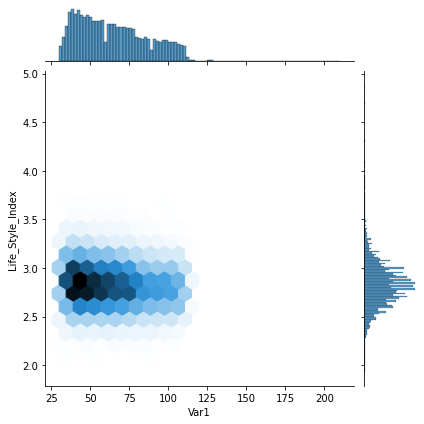

In [20]:
sns.jointplot(x='Var1', y="Life_Style_Index", data=df, kind='hex', gridsize=20)

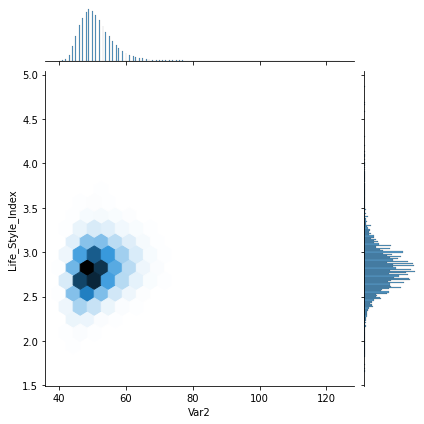

In [21]:
sns.jointplot(x='Var2', y="Life_Style_Index", data=df, kind='hex', gridsize=20)

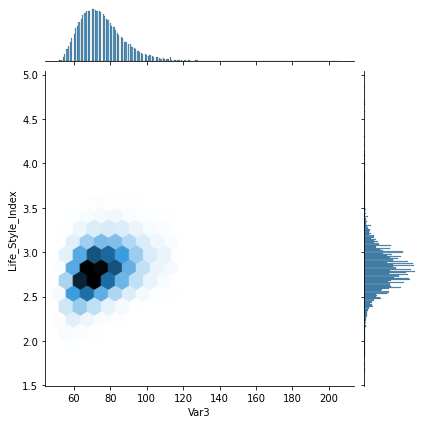

In [22]:
sns.jointplot(x='Var3', y="Life_Style_Index", data=df, kind='hex', gridsize=20)

In [23]:
print(df['Life_Style_Index'].mode())
print(df['Life_Style_Index'].mean())
print(df['Life_Style_Index'].median())

0    2.70697
dtype: float64
2.8022700765063884
2.79764


In [ ]:
#through hexplot Life_style_index ranges between 2 to 3.5

In [24]:
df['Life_Style_Index'].fillna(2.8, inplace=True)

In [25]:
df['Confidence_Life_Style_Index'].unique()

array(['B', nan, 'C', 'A'], dtype=object)

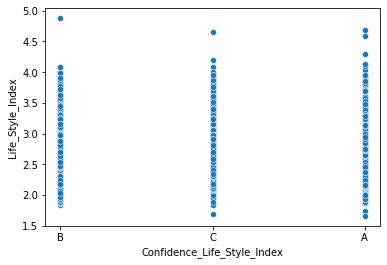

In [26]:
ax = sns.scatterplot(x="Confidence_Life_Style_Index", y="Life_Style_Index", data=df)

In [27]:
import random
df['Confidence_Life_Style_Index'].fillna(value=np.random.choice(['A','B','C']), inplace=True)

In [28]:
df

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
1,41.58,F,10.0,2.80000,A,E,3.50125,2,NaN,56,77,Male,2
2,61.56,C,10.0,2.80000,A,A,3.45375,0,NaN,52,74,Male,3
3,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
4,19.06,E,10.0,2.80000,A,A,2.59750,1,72.0,63,91,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,40.15,E,4.0,2.80000,A,A,2.74625,1,NaN,49,63,Female,3
109518,20.18,F,10.0,2.69374,C,F,4.52625,1,48.0,47,62,Female,3
109519,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
109520,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2


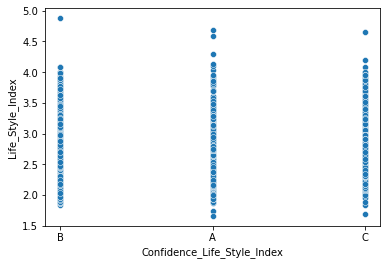

In [29]:
ax = sns.scatterplot(x="Confidence_Life_Style_Index", y="Life_Style_Index", data=df)

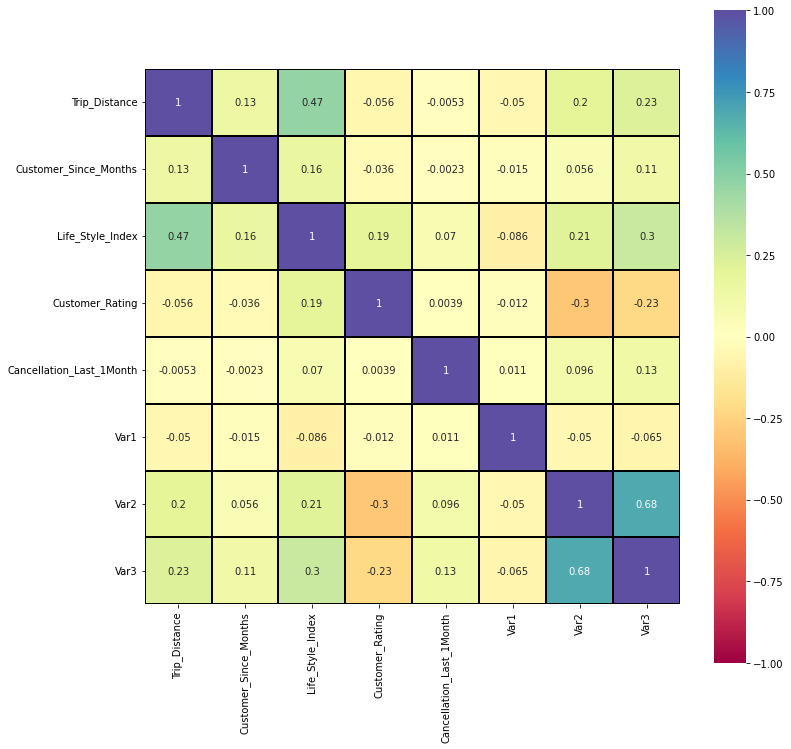

In [31]:
df2 = df.copy()
df2 = df2.drop("Surge_Pricing_Type", axis =1)
plt.figure(figsize=(12,12))
ax = plt.axes()
corr = df2.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="black", linewidths=0.01, ax=ax)
plt.show()

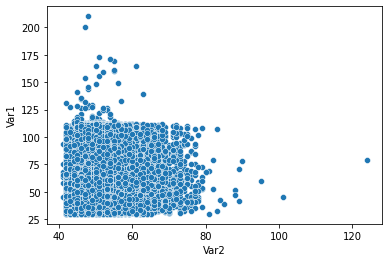

In [32]:
ax = sns.scatterplot(x="Var2", y="Var1", data=df)

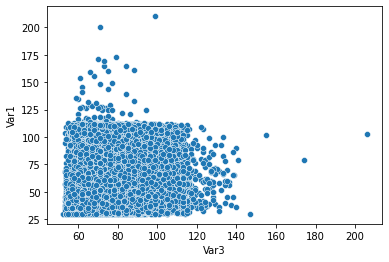

In [33]:
ax = sns.scatterplot(x="Var3", y="Var1", data=df)

In [34]:
print(df['Var1'].mode())
print(df['Var1'].mean())
print(df['Var1'].median())

0    39.0
dtype: float64
64.16925123602645
61.0


In [35]:
df['Var1'].fillna(64, inplace=True)

In [36]:
df

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
1,41.58,F,10.0,2.80000,A,E,3.50125,2,64.0,56,77,Male,2
2,61.56,C,10.0,2.80000,A,A,3.45375,0,64.0,52,74,Male,3
3,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
4,19.06,E,10.0,2.80000,A,A,2.59750,1,72.0,63,91,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,40.15,E,4.0,2.80000,A,A,2.74625,1,64.0,49,63,Female,3
109518,20.18,F,10.0,2.69374,C,F,4.52625,1,48.0,47,62,Female,3
109519,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
109520,74.81,C,7.0,2.81059,C,A,0.44500,0,64.0,63,88,Male,2


In [38]:
#Identify Missing data
count = 0
for col in df.columns:
    if df[col].isnull().sum() == 0:
        count+=1
    else:
        print("Missing values found in "+col)

if count==df.shape[1]:
    print("No missing value found")

No missing value found


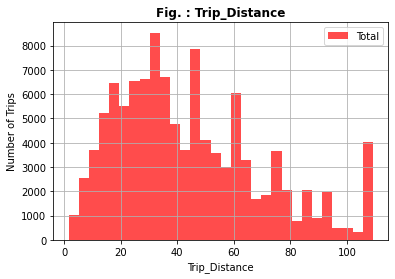

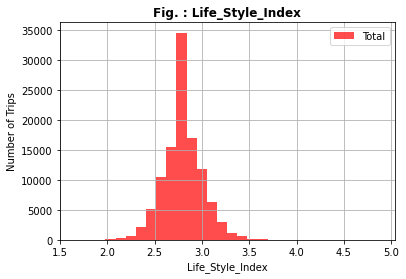

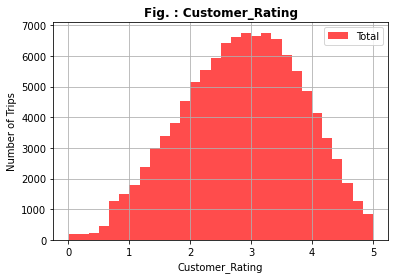

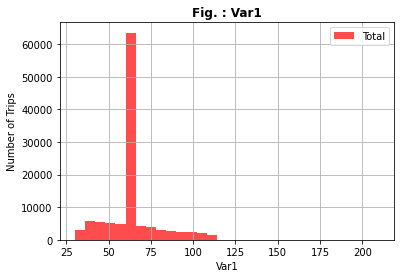

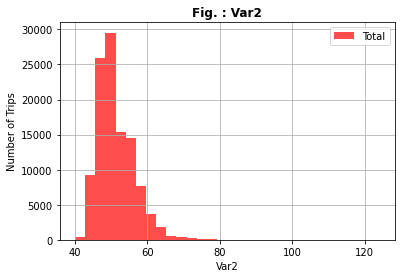

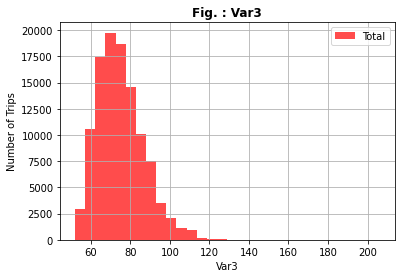

In [39]:
# Credit Limit (Feature name :'LIMIT_BAL' )
%matplotlib inline
cont_df = df[['Trip_Distance','Life_Style_Index','Customer_Rating','Var1','Var2','Var3']]
for col in cont_df.columns:
    bins = 30
    plt.hist(df[col], bins = bins, color='r',label = 'Total',alpha=0.7)
#     plt.hist(df[col][df['Surge_Pricing_Type'] == 1], bins = bins, color='k',label = 'Surge_Price_1')
#     plt.hist(df[col][df['Surge_Pricing_Type'] == 2], bins = bins, color='r',label = 'Surge_Price_2')
#     plt.hist(df[col][df['Surge_Pricing_Type'] == 3], bins = bins, color='y',label = 'Surge_Price_3')

    plt.xlabel(col);plt.ylabel('Number of Trips')
    plt.title('Fig. : '+col,fontweight="bold", size=12)
    plt.legend()
    plt.grid()
    plt.show()

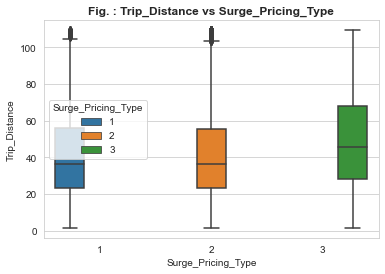

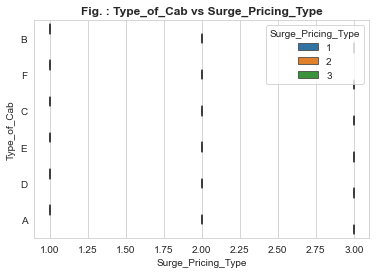

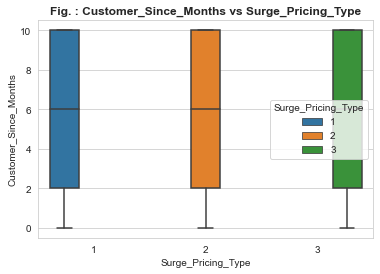

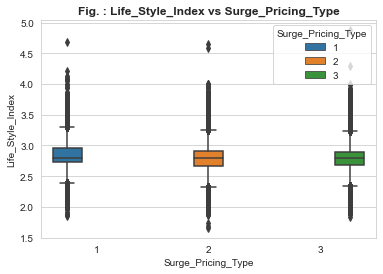

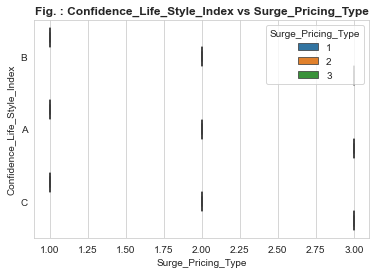

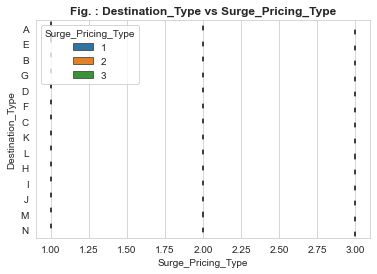

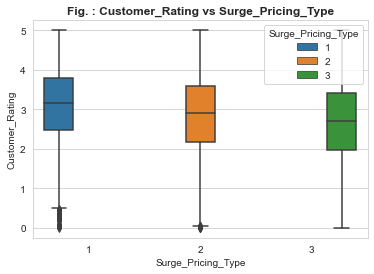

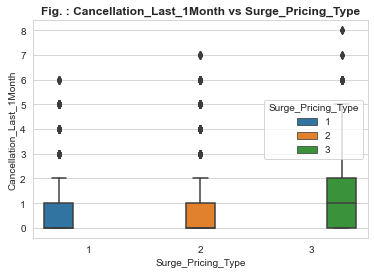

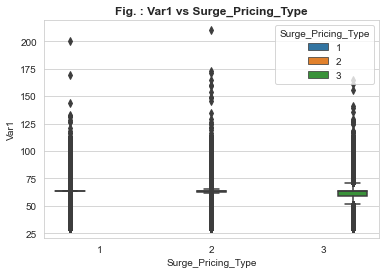

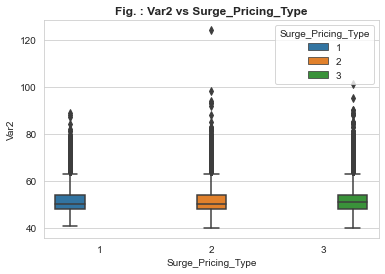

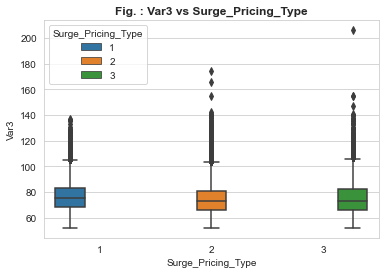

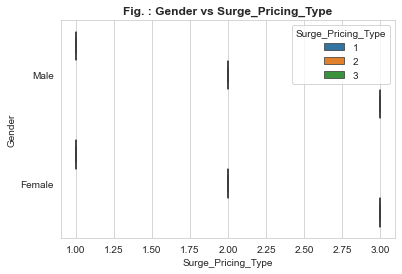

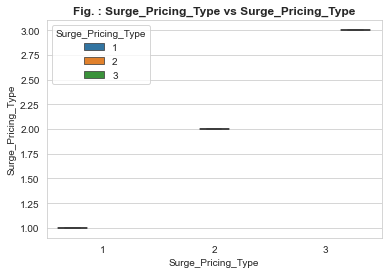

In [40]:
for col in df.columns:
    sns.set_style("whitegrid") 
    sns.boxplot(x = 'Surge_Pricing_Type', y = col, data = df, hue='Surge_Pricing_Type')
    plt.title('Fig. : '+col+' vs Surge_Pricing_Type',fontweight="bold", size=12)
    plt.show()

In [41]:
df = pd.get_dummies(df, columns=['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender'],drop_first=True)

In [42]:
df

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
1,41.58,10.0,2.80000,3.50125,2,64.0,56,77,2,0,...,0,0,0,0,0,0,0,0,0,1
2,61.56,10.0,2.80000,3.45375,0,64.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
3,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1
4,19.06,10.0,2.80000,2.59750,1,72.0,63,91,3,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,40.15,4.0,2.80000,2.74625,1,64.0,49,63,3,0,...,0,0,0,0,0,0,0,0,0,0
109518,20.18,10.0,2.69374,4.52625,1,48.0,47,62,3,0,...,1,0,0,0,0,0,0,0,0,0
109519,11.72,1.0,2.74229,3.28500,0,61.0,47,76,3,0,...,0,0,0,0,0,0,0,0,0,1
109520,74.81,7.0,2.81059,0.44500,0,64.0,63,88,2,0,...,0,0,0,0,0,0,0,0,0,1


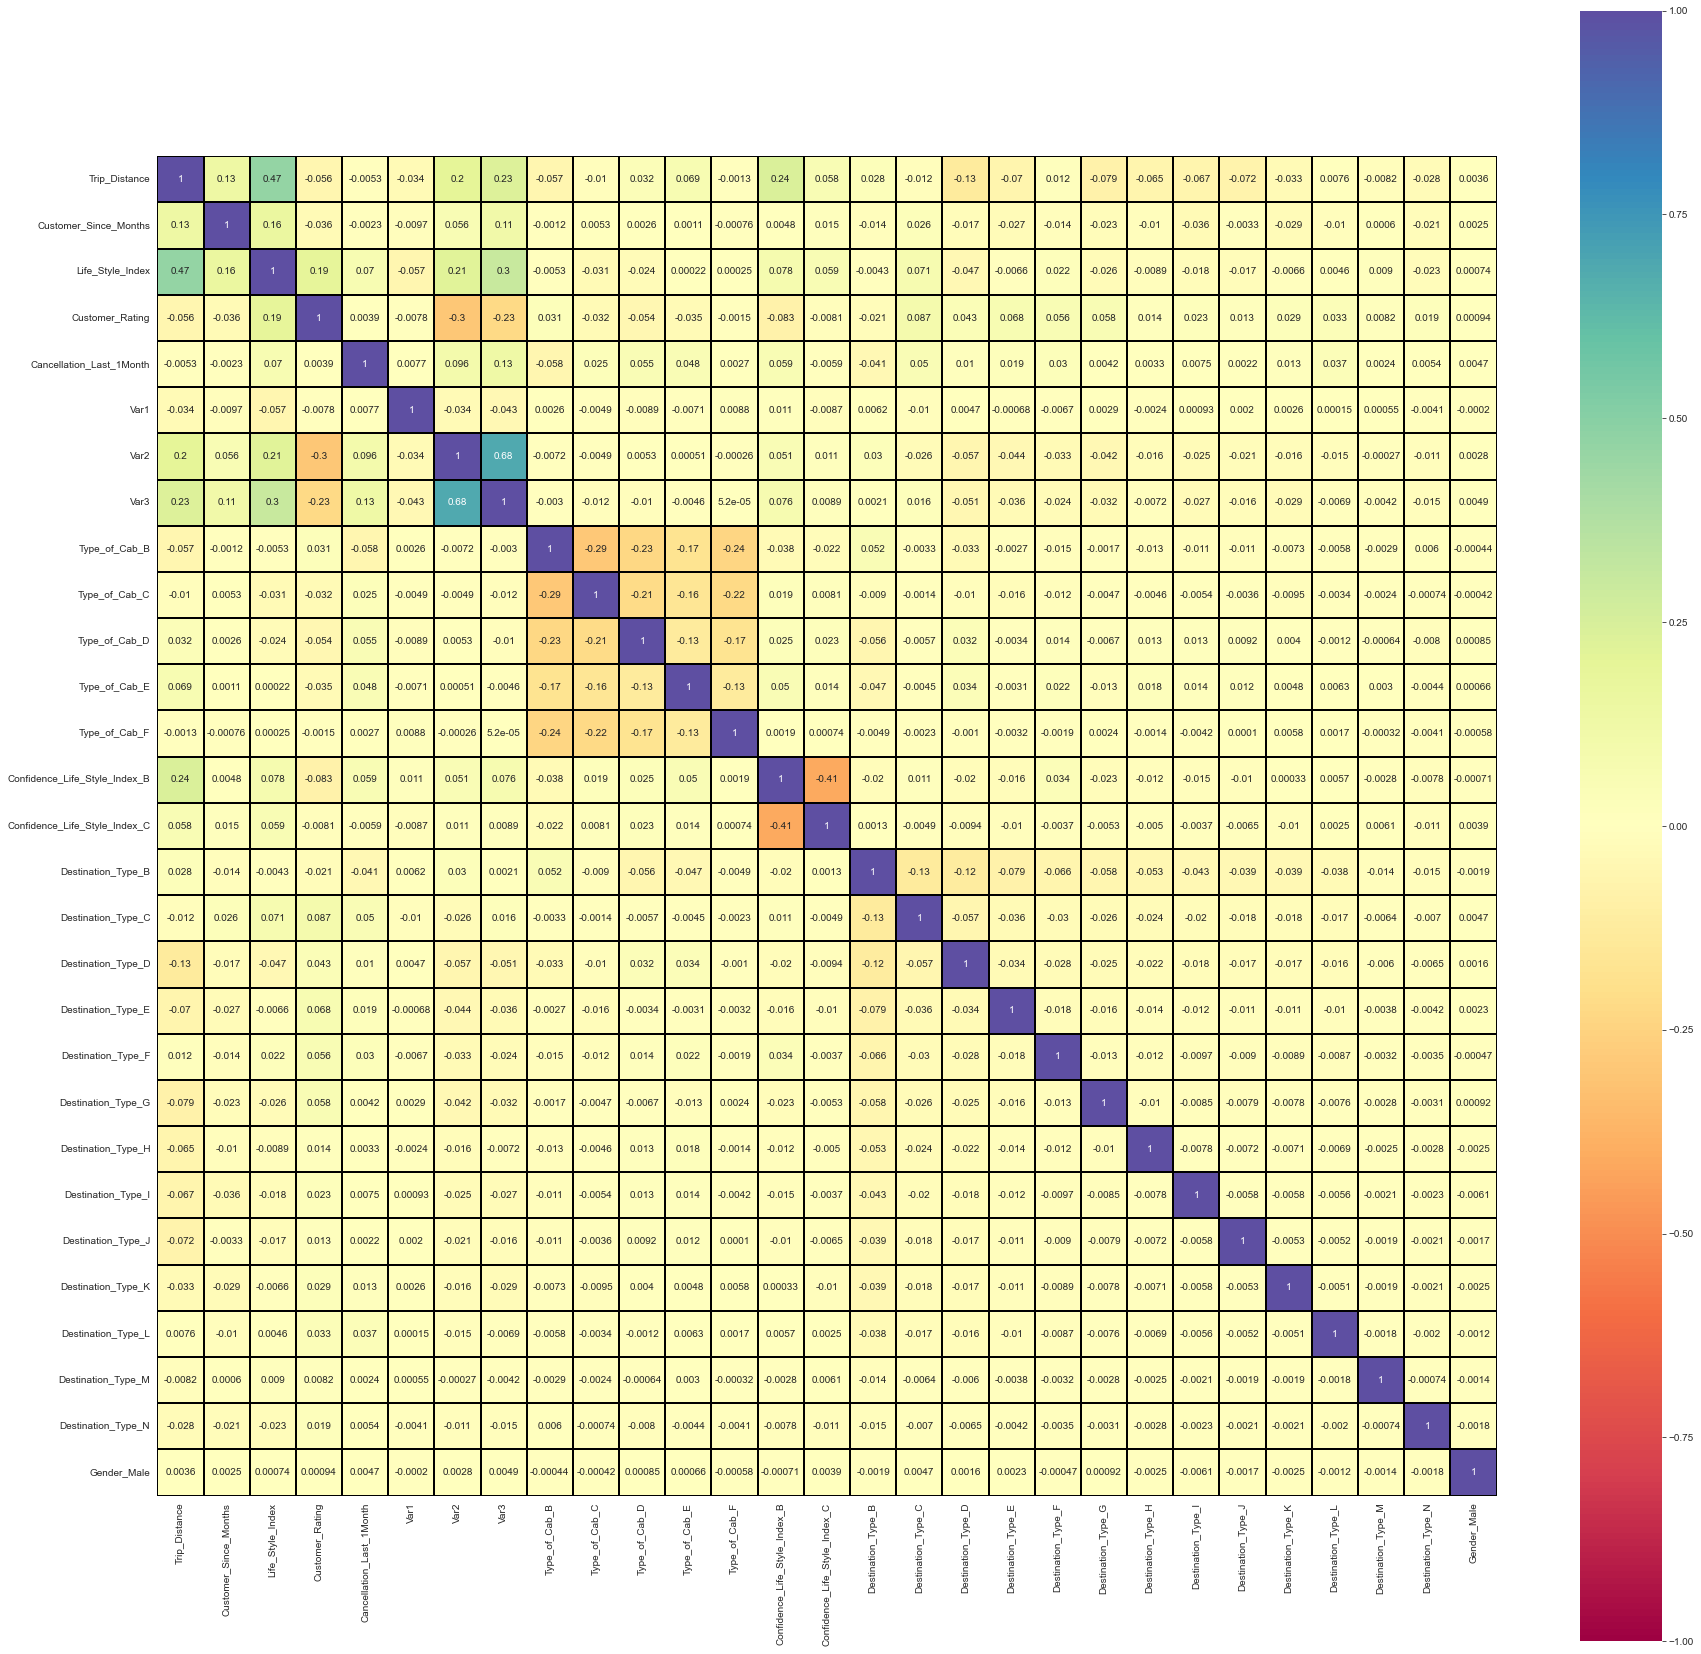

In [43]:
df2 = df.copy()
df2 = df2.drop("Surge_Pricing_Type", axis =1)
plt.figure(figsize=(30,30))
ax = plt.axes()
corr = df2.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="black", linewidths=0.01, ax=ax)
plt.show()

In [44]:
correlated_features = set()

for i in range(len(corr .columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            colname = corr.columns[i]
            correlated_features.add(colname)
print(correlated_features)

set()


In [45]:
cont_list = ['Trip_Distance','Customer_Since_Months','Life_Style_Index','Customer_Rating','Cancellation_Last_1Month','Var1','Var2','Var3']
scaled_features = df.copy()
features = scaled_features[cont_list]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = cont_list)

df = df.drop(cont_list,axis=1)
df = pd.concat([df,scaled_features],axis=1)

In [46]:
df

,Surge_Pricing_Type,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Type_of_Cab_F,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,...,Destination_Type_N,Gender_Male,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
0,2,1,0,0,0,0,1,0,0,0,...,0,1,-0.575855,1.131119,-0.093858,0.611516,-0.755252,-1.760957,0.963121,0.251393
1,2,0,0,0,0,1,0,0,0,0,...,0,1,-0.101246,1.131119,-0.009259,0.663699,1.175059,-0.005256,0.963121,0.165056
2,3,0,1,0,0,0,0,0,0,0,...,0,1,0.681800,1.131119,-0.009259,0.615334,-0.755252,-0.005256,0.160469,-0.093955
3,2,0,1,0,0,0,1,0,0,0,...,0,1,0.422744,1.131119,1.121275,0.563151,3.105369,-0.883106,-0.441520,2.323479
4,3,0,0,0,1,0,0,0,0,0,...,0,1,-0.983838,1.131119,-0.009259,-0.256502,0.209903,0.534960,2.367762,1.373773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109517,3,0,0,0,1,0,0,0,0,0,...,0,0,-0.157290,-0.466258,-0.009259,-0.105044,0.209903,-0.005256,-0.441520,-1.043661
109518,3,0,0,0,0,1,0,1,0,0,...,0,0,-0.939944,1.131119,-0.521477,1.707356,0.209903,-1.085687,-0.842846,-1.129998
109519,3,0,0,1,0,0,0,0,0,0,...,0,1,-1.271504,-1.264946,-0.287446,0.443512,-0.755252,-0.207837,-0.842846,0.078719
109520,2,0,1,0,0,0,0,1,0,0,...,0,1,1.201087,0.332431,0.041789,-2.448182,-0.755252,-0.005256,2.367762,1.114762


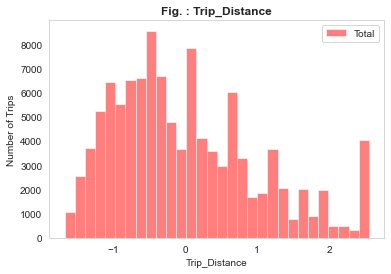

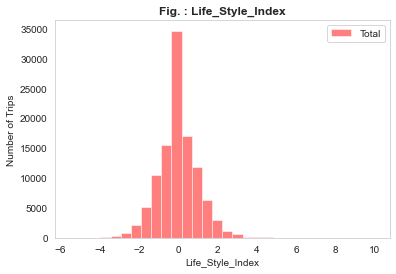

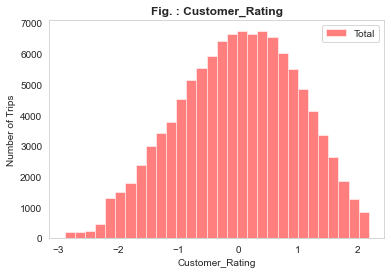

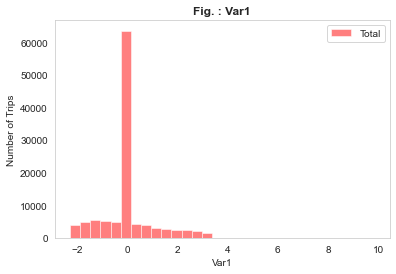

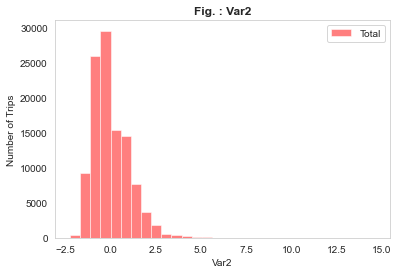

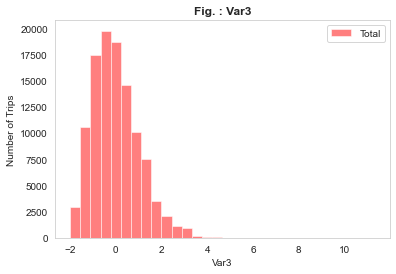

In [48]:
# Credit Limit
%matplotlib inline
cont_df = df[['Trip_Distance','Life_Style_Index','Customer_Rating','Var1','Var2','Var3']]
for col in cont_df.columns:
    bins = 30
    plt.hist(df[col], bins = bins, color='r',label = 'Total',alpha=0.5)
    plt.xlabel(col);plt.ylabel('Number of Trips')
    plt.title('Fig. : '+col,fontweight="bold", size=12)
    plt.legend()
    plt.grid()
    plt.show()

In [49]:
last_col = df.pop('Surge_Pricing_Type')
df.insert(len(df.columns),'Surge_Pricing_Type',last_col)

In [50]:
print(df.columns)
print(len(df.columns))

Index(['Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E',
       'Type_of_Cab_F', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Destination_Type_B',
       'Destination_Type_C', 'Destination_Type_D', 'Destination_Type_E',
       'Destination_Type_F', 'Destination_Type_G', 'Destination_Type_H',
       'Destination_Type_I', 'Destination_Type_J', 'Destination_Type_K',
       'Destination_Type_L', 'Destination_Type_M', 'Destination_Type_N',
       'Gender_Male', 'Trip_Distance', 'Customer_Since_Months',
       'Life_Style_Index', 'Customer_Rating', 'Cancellation_Last_1Month',
       'Var1', 'Var2', 'Var3', 'Surge_Pricing_Type'],
      dtype='object')
30


In [51]:
X = df.iloc[:,:-1]
y = df.Surge_Pricing_Type
print(X.shape)
print(y.shape)

(109522, 29)
(109522,)


In [52]:
# train test split into 70-30
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
print(Counter(y_train))
print(Counter(y_test))

Counter({2: 33023, 3: 27760, 1: 15882})
Counter({2: 14153, 3: 11897, 1: 6807})


In [53]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

# evaluation of model
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, round(cv_results.mean()*100,2), cv_results.std()))

c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LR: 69.290000 (0.004084)
DT: 57.530000 (0.003236)
RF: 69.420000 (0.003138)


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 70.160000 (0.003180)


In [54]:
results

[array([0.69040631, 0.69751516, 0.68981934, 0.68858019, 0.69816735]),
 array([0.56994717, 0.5794039 , 0.57399074, 0.57581687, 0.57751255]),
 array([0.69444988, 0.69627601, 0.69053675, 0.69092806, 0.69875432]),
 array([0.70031957, 0.70351529, 0.69881954, 0.69842823, 0.70684145])]

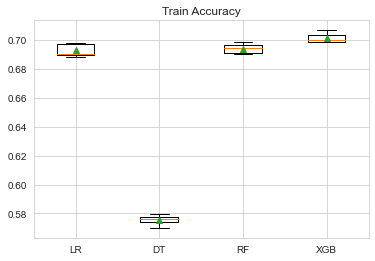

In [55]:
#Algorithm Equivalence

from matplotlib import pyplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Train Accuracy')
pyplot.show()

LR


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature: 0, Score: -1.34930
Feature: 1, Score: -2.68885
Feature: 2, Score: -2.20682
Feature: 3, Score: -1.89488
Feature: 4, Score: -1.47354
Feature: 5, Score: -0.40754
Feature: 6, Score: -0.17343
Feature: 7, Score: 0.44560
Feature: 8, Score: 0.09446
Feature: 9, Score: -0.46141
Feature: 10, Score: 0.26237
Feature: 11, Score: -0.39698
Feature: 12, Score: 0.39299
Feature: 13, Score: -0.46879
Feature: 14, Score: -0.48535
Feature: 15, Score: -0.32153
Feature: 16, Score: 0.07793
Feature: 17, Score: 0.16594
Feature: 18, Score: -0.15090
Feature: 19, Score: 0.41784
Feature: 20, Score: 0.00239
Feature: 21, Score: -0.24679
Feature: 22, Score: -0.04656
Feature: 23, Score: 0.20718
Feature: 24, Score: 0.22514
Feature: 25, Score: -0.32201
Feature: 26, Score: 0.05645
Feature: 27, Score: -0.01449
Feature: 28, Score: 0.19755


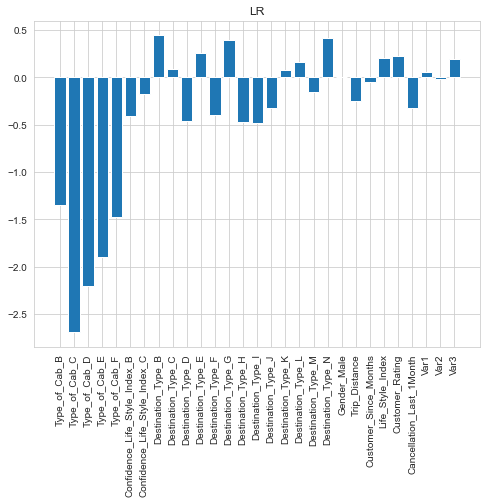

68.79
[[ 3759  2200   848]
 [  681 10979  2493]
 [  659  3373  7865]]
              precision    recall  f1-score   support

           1       0.74      0.55      0.63      6807
           2       0.66      0.78      0.72     14153
           3       0.70      0.66      0.68     11897

    accuracy                           0.69     32857
   macro avg       0.70      0.66      0.68     32857
weighted avg       0.69      0.69      0.69     32857



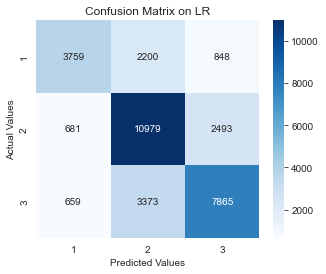

DT
Trip_Distance : 13.28%
Customer_Rating : 12.16%
Life_Style_Index : 10.73%
Type_of_Cab_B : 9.65%
Var3 : 8.08%
Var2 : 6.42%
Type_of_Cab_C : 5.95%
Var1 : 5.9%
Type_of_Cab_D : 5.01%
Customer_Since_Months : 4.92%
Type_of_Cab_F : 4.5%
Type_of_Cab_E : 3.52%
Cancellation_Last_1Month : 2.54%
Gender_Male : 1.33%
Destination_Type_B : 1.25%
Confidence_Life_Style_Index_B : 1.22%
Confidence_Life_Style_Index_C : 0.96%
Destination_Type_D : 0.58%
Destination_Type_C : 0.5%
Destination_Type_E : 0.31%
Destination_Type_F : 0.25%
Destination_Type_H : 0.2%
Destination_Type_G : 0.19%
Destination_Type_J : 0.14%
Destination_Type_L : 0.14%
Destination_Type_I : 0.12%
Destination_Type_K : 0.12%
Destination_Type_M : 0.02%
Destination_Type_N : 0.01%


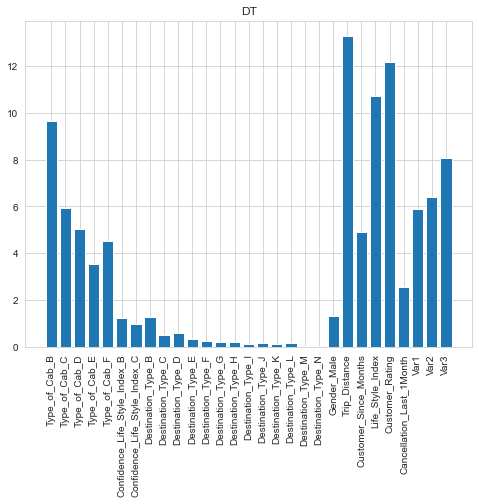

57.53
[[3533 2042 1232]
 [2183 8277 3693]
 [1244 3560 7093]]
              precision    recall  f1-score   support

           1       0.51      0.52      0.51      6807
           2       0.60      0.58      0.59     14153
           3       0.59      0.60      0.59     11897

    accuracy                           0.58     32857
   macro avg       0.56      0.57      0.57     32857
weighted avg       0.58      0.58      0.58     32857



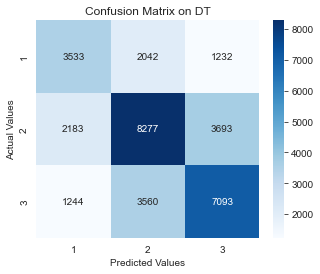

RF
Trip_Distance : 12.08%
Customer_Rating : 11.35%
Life_Style_Index : 10.18%
Type_of_Cab_B : 9.31%
Var3 : 8.96%
Var2 : 7.43%
Type_of_Cab_D : 6.79%
Var1 : 6.24%
Customer_Since_Months : 5.52%
Type_of_Cab_C : 4.96%
Cancellation_Last_1Month : 3.34%
Type_of_Cab_E : 2.94%
Type_of_Cab_F : 2.59%
Gender_Male : 1.6%
Confidence_Life_Style_Index_B : 1.33%
Destination_Type_B : 1.3%
Confidence_Life_Style_Index_C : 1.09%
Destination_Type_C : 0.65%
Destination_Type_D : 0.62%
Destination_Type_E : 0.34%
Destination_Type_F : 0.29%
Destination_Type_G : 0.23%
Destination_Type_H : 0.21%
Destination_Type_I : 0.15%
Destination_Type_L : 0.15%
Destination_Type_J : 0.14%
Destination_Type_K : 0.14%
Destination_Type_M : 0.03%
Destination_Type_N : 0.02%


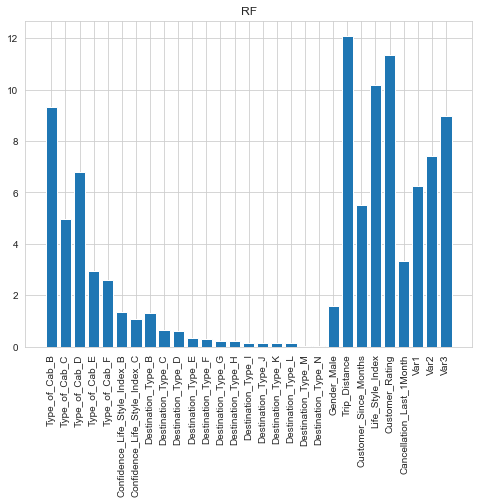

69.09
[[ 3825  2065   917]
 [  782 10851  2520]
 [  597  3276  8024]]
              precision    recall  f1-score   support

           1       0.74      0.56      0.64      6807
           2       0.67      0.77      0.72     14153
           3       0.70      0.67      0.69     11897

    accuracy                           0.69     32857
   macro avg       0.70      0.67      0.68     32857
weighted avg       0.69      0.69      0.69     32857



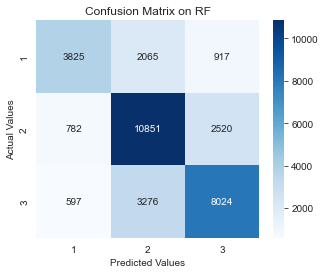

XGB


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Type_of_Cab_B : 20.48%
Type_of_Cab_D : 20.02%
Type_of_Cab_E : 15.96%
Type_of_Cab_F : 15.19%
Type_of_Cab_C : 11.19%
Confidence_Life_Style_Index_B : 2.5%
Cancellation_Last_1Month : 1.63%
Destination_Type_B : 1.6%
Destination_Type_D : 1.34%
Confidence_Life_Style_Index_C : 0.76%
Destination_Type_I : 0.73%
Destination_Type_F : 0.72%
Destination_Type_H : 0.69%
Destination_Type_G : 0.65%
Trip_Distance : 0.65%
Var1 : 0.65%
Destination_Type_E : 0.54%
Customer_Rating : 0.51%
Var3 : 0.5%
Destination_Type_J : 0.48%
Life_Style_Index : 0.48%
Destination_Type_L : 0.45%
Destination_Type_C : 0.44%
Destination_Type_K : 0.37%
Var2 : 0.35%
Customer_Since_Months : 0.31%
Destination_Type_N : 0.28%
Gend

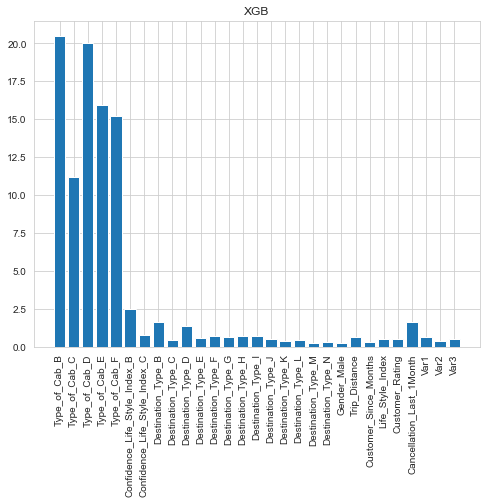

69.84
[[ 3920  2124   763]
 [  781 10951  2421]
 [  569  3252  8076]]
              precision    recall  f1-score   support

           1       0.74      0.58      0.65      6807
           2       0.67      0.77      0.72     14153
           3       0.72      0.68      0.70     11897

    accuracy                           0.70     32857
   macro avg       0.71      0.68      0.69     32857
weighted avg       0.70      0.70      0.70     32857



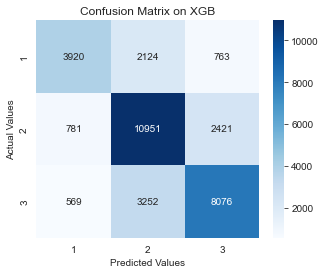

In [56]:
for name,model in models:
    print(name)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    if name=='LR':
        importance = model.coef_[0]
        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
        plt.figure(figsize=(8,6))
        pyplot.bar([x for x in X_train.columns], importance)
        plt.title(name)
        plt.xticks(rotation='vertical')
        pyplot.show()
        
    else:   
        importance = model.feature_importances_	
        imp = [round(ele*100,2) for ele in importance]
        result = dict(zip(X_train.columns, imp))
        feature_dict = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
        for key,value in feature_dict.items():
            print("{} : {}%".format(key,value))
        # plot feature importance
        plt.figure(figsize=(8,6))
        pyplot.bar([x for x in X_train.columns], imp)        
        plt.title(name)
        plt.xticks(rotation='vertical')
        pyplot.show()

    # Validation data evaluation
    print(round(accuracy_score(y_test, y_pred)*100,2))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Confusion matrix to compare actual and predicted data
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                         index = ['1','2','3'], 
                         columns = ['1','2','3'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')
    plt.title('Confusion Matrix on '+name)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()


In [62]:
#Tuning the hyperparameters of XGB to enhance accuracy

In [57]:
models = []
models.append(('XGB', XGBClassifier(objective = "multi:softmax", booster = "gbtree", nthread = 4, silent = 1,
                eta = 0.08, max_depth = 6, subsample = 0.9, colsample_bytree = 0.7,
                min_child_weight = 1, num_class = 3,
                seed = 2016, tree_method = "exact")))

#Model Evaluation
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, round(cv_results.mean()*100,2), cv_results.std()))

c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 70.280000 (0.004593)


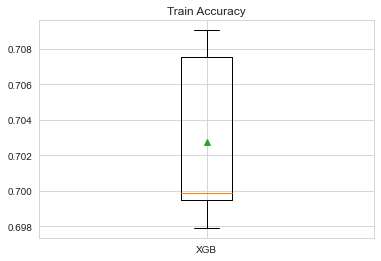

In [58]:
#Algorithm Equivalence

from matplotlib import pyplot
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Train Accuracy')
pyplot.show()

XGB
[19:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




c:\users\waqas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Type_of_Cab_B : 27.49%
Type_of_Cab_D : 22.25%
Type_of_Cab_E : 14.11%
Type_of_Cab_C : 12.37%
Type_of_Cab_F : 11.44%
Confidence_Life_Style_Index_B : 1.88%
Cancellation_Last_1Month : 1.51%
Destination_Type_B : 1.17%
Destination_Type_D : 0.86%
Confidence_Life_Style_Index_C : 0.67%
Trip_Distance : 0.62%
Var1 : 0.55%
Destination_Type_H : 0.46%
Destination_Type_F : 0.45%
Destination_Type_I : 0.45%
Customer_Rating : 0.45%
Var3 : 0.43%
Life_Style_Index : 0.42%
Destination_Type_E : 0.28%
Destination_Type_J : 0.28%
Destination_Type_C : 0.25%
Destination_Type_G : 0.25%
Destination_Type_L : 0.23%
Destination_Type_N : 0.23%
Destination_Type_K : 0.21%
Var2 : 0.19%
Destination_Type_M : 0.18%
Cust

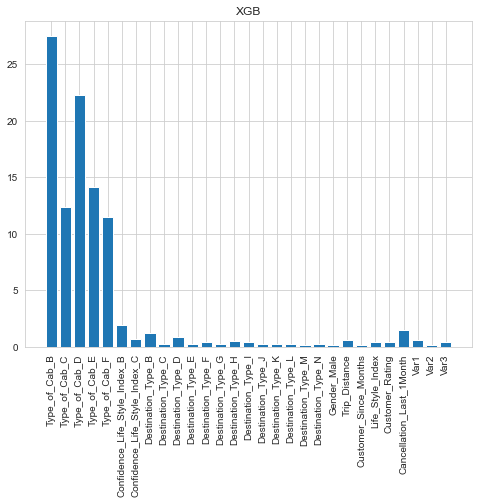

70.05
[[ 3840  2175   792]
 [  682 11237  2234]
 [  578  3381  7938]]
              precision    recall  f1-score   support

           1       0.75      0.56      0.64      6807
           2       0.67      0.79      0.73     14153
           3       0.72      0.67      0.69     11897

    accuracy                           0.70     32857
   macro avg       0.72      0.68      0.69     32857
weighted avg       0.71      0.70      0.70     32857



In [59]:
for name,model in models:
    print(name)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # feature significance
    if name=='LR':
        importance = model.coef_[0]
        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
        plt.figure(figsize=(8,6))
        pyplot.bar([x for x in X_train.columns], importance)
        plt.title(name)
        plt.xticks(rotation='vertical')
        pyplot.show()
        
    else:   
        importance = model.feature_importances_	
        imp = [round(ele*100,2) for ele in importance]
        result = dict(zip(X_train.columns, imp))
        feature_dict = {k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}
        for key,value in feature_dict.items():
            print("{} : {}%".format(key,value))
        # plot feature importance
        plt.figure(figsize=(8,6))
        pyplot.bar([x for x in X_train.columns], imp)        
        plt.title(name)
        plt.xticks(rotation='vertical')
        pyplot.show()

    # evaluating predictions on validation data
    print(round(accuracy_score(y_test, y_pred)*100,2))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    


In [60]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

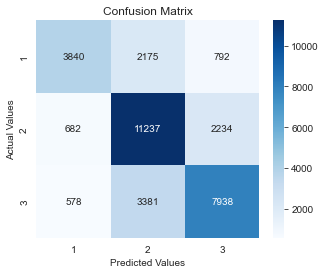

In [61]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [62]:
pred = X_test
pred['y_test'] = y_test
pred['y_pred'] = y_pred
pred

,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Type_of_Cab_F,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,...,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,y_test,y_pred
101147,1,0,0,0,0,0,1,0,0,0,...,-0.533136,0.332431,3.248093,0.551696,5.035680,2.830878,0.561795,0.683077,1,2
36790,1,0,0,0,0,0,0,0,0,0,...,-1.171957,-1.531175,-0.009259,-0.465233,1.175059,-0.005256,-1.444835,-1.216335,3,2
60443,0,1,0,0,0,0,0,0,0,0,...,-0.645616,-0.998717,-0.009259,-0.162318,-0.755252,-2.301173,-0.441520,0.078719,2,2
102694,0,0,0,0,0,0,0,1,0,0,...,0.001044,1.131119,0.939738,1.021342,-0.755252,-0.005256,-0.240857,-0.352966,1,1
62112,0,0,1,0,0,0,1,0,0,0,...,-0.784354,1.131119,-0.281951,-0.204319,-0.755252,-1.896011,0.361132,0.337730,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,1,0,0,0,0,0,1,0,0,0,...,-1.075154,-0.732487,-0.696941,0.995887,0.209903,-0.342891,-0.040194,-0.352966,2,2
78436,1,0,0,0,0,1,0,0,0,0,...,-0.883508,-0.200028,-0.996867,-0.555599,-0.755252,2.763351,-0.441520,0.337730,2,2
8387,0,0,0,0,0,0,1,0,0,0,...,0.951437,1.131119,0.743257,-0.293412,-0.755252,-0.005256,0.160469,1.201099,1,1
103190,0,1,0,0,0,1,0,0,0,0,...,1.404882,-0.998717,-0.292796,-0.559417,-0.755252,-0.005256,0.963121,0.510403,2,3


In [63]:
pred.to_csv("Prediction.csv",index=False)